In [1]:
import pandas as pd
import seaborn as sns

In [2]:
#importing dataset
df=pd.read_csv("SBI_Life_insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [3]:
#lets check whether there are null values or not
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [4]:
#Lets chcek the count of each class in target varaible
df['insuranceclaim'].value_counts()

1    783
0    555
Name: insuranceclaim, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
age               1338 non-null int64
sex               1338 non-null int64
bmi               1338 non-null float64
children          1338 non-null int64
smoker            1338 non-null int64
region            1338 non-null int64
charges           1338 non-null float64
insuranceclaim    1338 non-null int64
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [6]:
#lets describe the matrix
df.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


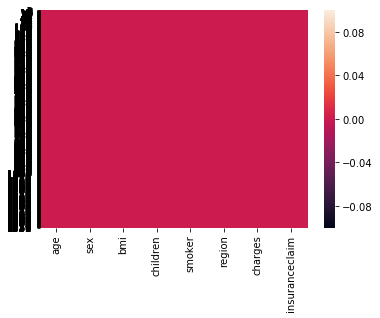

In [7]:
#checking  null values by heatmap 
sns.heatmap(df.isnull(),yticklabels=True)

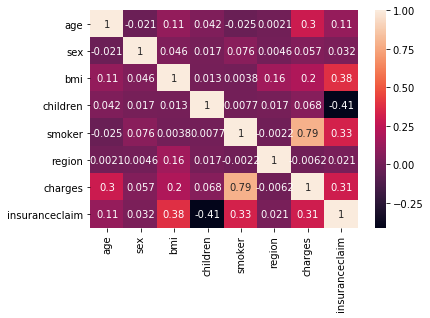

In [8]:
#chcek the correlation matrix
sns.heatmap(df.corr(),annot=True)

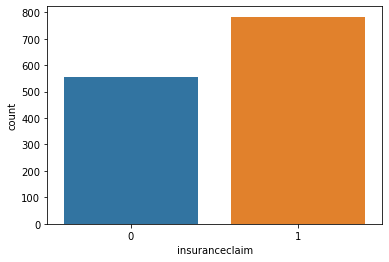

In [9]:
#check the count of each class in target varaible
sns.countplot(x='insuranceclaim',data=df)

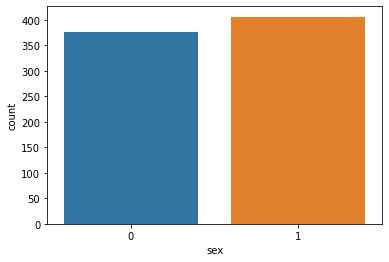

In [10]:
#lets chcek count male and female among who claimed insurance
sns.countplot(x="sex",data=df.loc[df['insuranceclaim']==1])

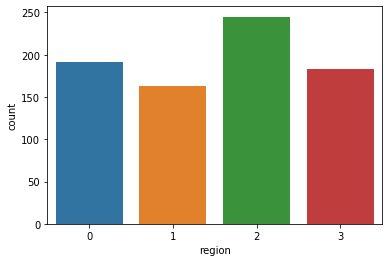

In [11]:
sns.countplot(x="region",data=df.loc[df["insuranceclaim"]==1])

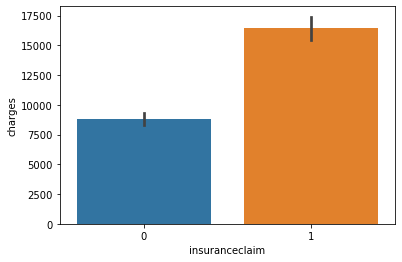

In [12]:
#compare the charges  which class claimed with high values
sns.barplot(x="insuranceclaim",y="charges",data=df)

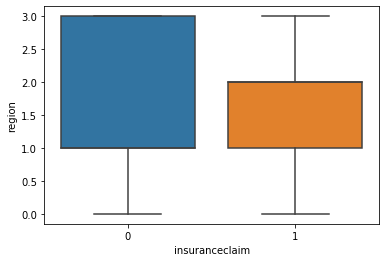

In [13]:
sns.boxplot(y='region',x='insuranceclaim',data=df)

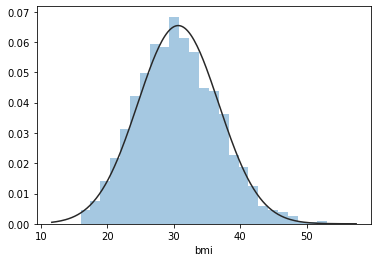

In [14]:
#bmi is normal distribution
from scipy.stats import norm
sns.distplot(df['bmi'],fit=norm, kde=False)

In [15]:
#lets check skewness 
df.skew()

age               0.055673
sex              -0.020951
bmi               0.284047
children          0.938380
smoker            1.464766
region           -0.038101
charges           1.515880
insuranceclaim   -0.346254
dtype: float64

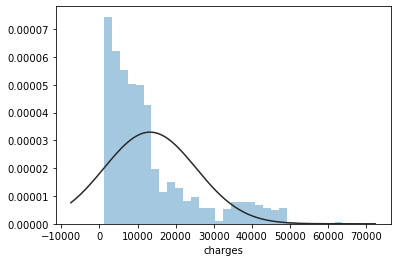

In [16]:
#charges is right skewed
sns.distplot(df['charges'],fit=norm, kde=False)

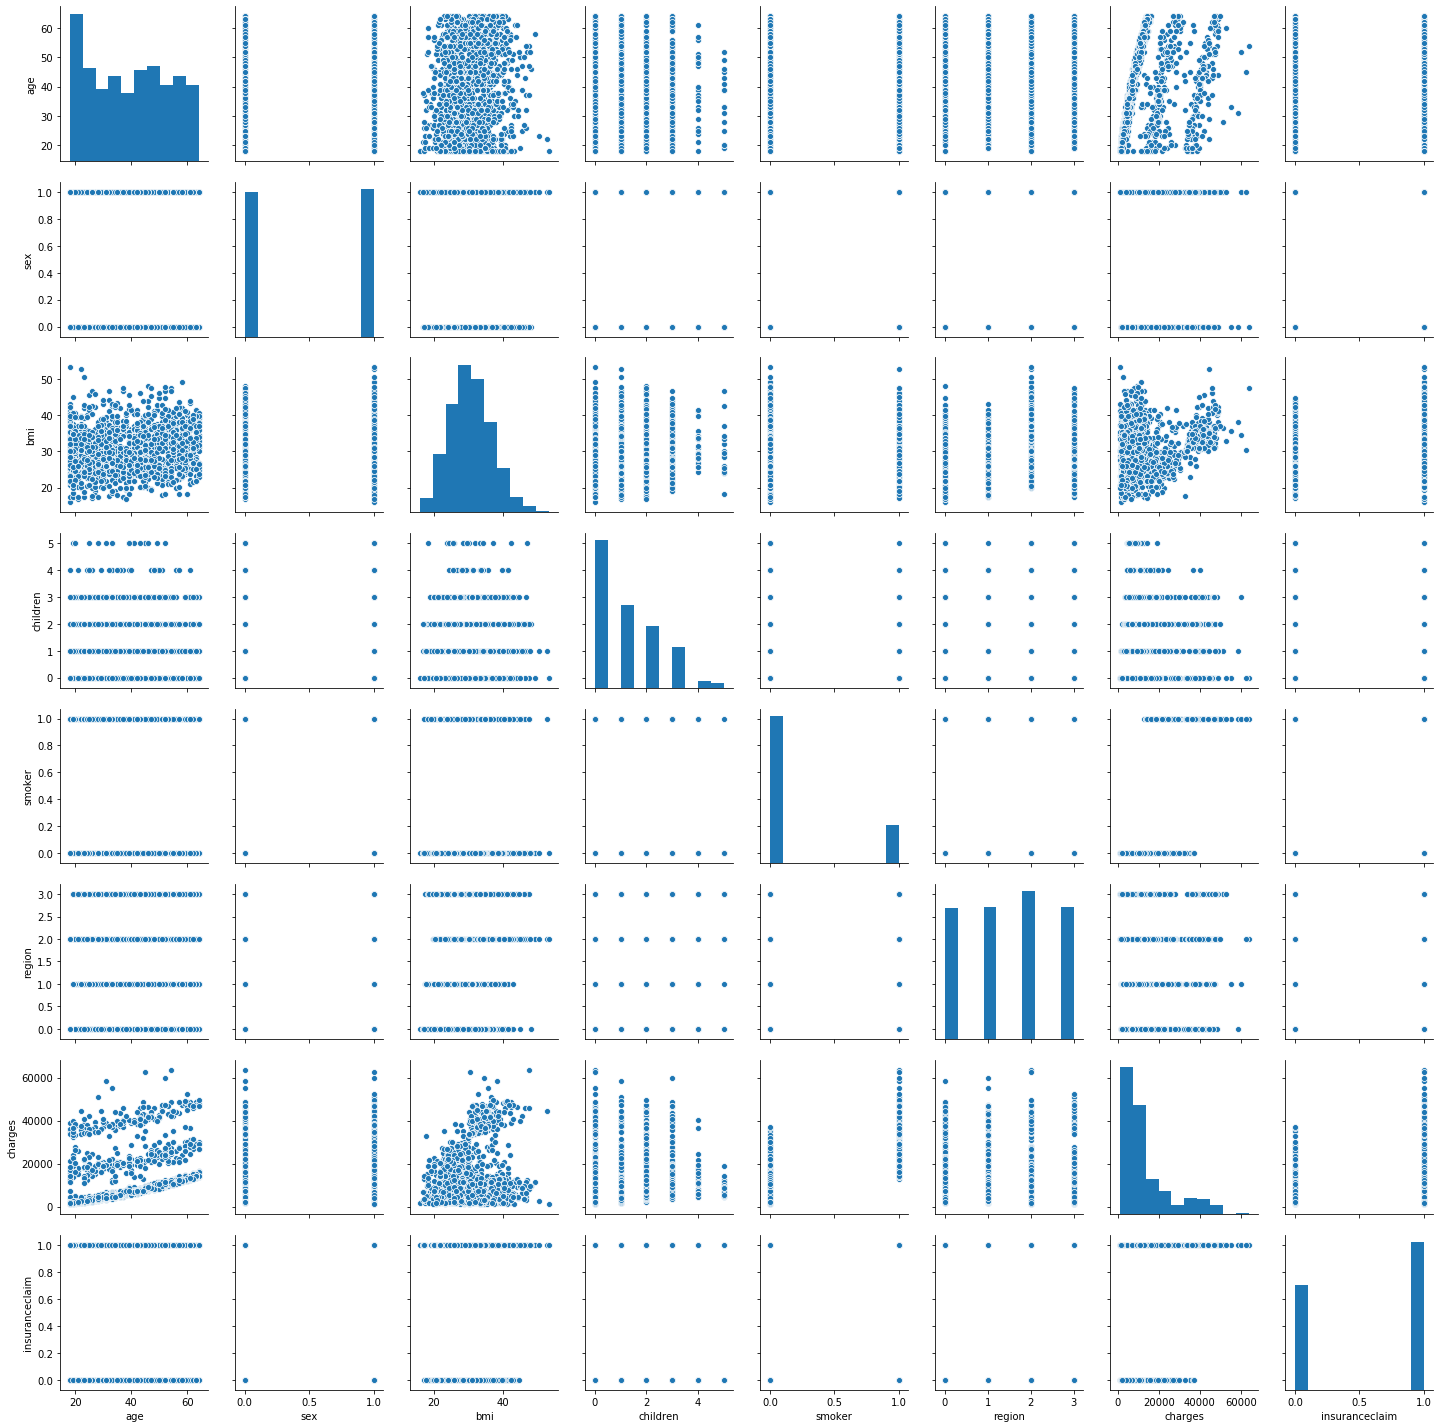

In [17]:
#Lets make pairplot
sns.pairplot(df)

In [18]:
# lets separte input(x) and output(y)
x=df.drop(columns=["insuranceclaim"],axis=1)
x.head(1)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.9,0,1,3,16884.924


In [19]:
y=df[["insuranceclaim"]]
y.head(3)

,insuranceclaim
0,1
1,1
2,0


In [20]:
#lets bring all features to common scale 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x)
x=sc.transform(x)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [22]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 42,test_size=0.20,stratify=y)
model=[LogisticRegression(),SVC(),KNeighborsClassifier(),GaussianNB(),XGBClassifier(),
       DecisionTreeClassifier(),RandomForestClassifier()]

In [23]:
#lets check which model perform best
import warnings
warnings.filterwarnings("ignore")
for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print("model",m, f1_score(y_test,pred))
    print()
    print()

model LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) 0.8825396825396825


model SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) 0.9144736842105264


model KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') 0.8980891719745222


model GaussianNB(priors=None, var_smoothing=1e-09) 0.7265917602996254


model XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
         

In [24]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
def maxf1_score(clf,df_x,y):
    maxf=0
    rs=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = r_state,test_size=0.20,stratify=y)
        clf.fit(x_train,y_train)
        y_pred=clf.predict(x_test)
        tmp=f1_score(y_test,y_pred)
        if tmp>maxf:
            maxf=tmp
            rs=r_state
    print("maximum f1_score is at random state :",rs," and it is :",maxf)

In [25]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
maxf1_score(lr,x,y)

maximum f1_score is at random state : 97  and it is : 0.9274447949526814


In [27]:
from sklearn.model_selection import cross_val_score
print("Mean f1 score for logistic classifier: ",cross_val_score(lr,x,y,cv=5,scoring="f1").mean())

Mean f1 score for logistic classifier:  0.8974301207825608


In [28]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters={"n_estimators":[10,100,500]}
rf_clf=RandomForestClassifier()
clf = GridSearchCV(rf_clf, parameters, cv=5,scoring="f1")
clf.fit(x,y)
clf.best_params_

{'n_estimators': 500}

In [29]:
rf_clf=RandomForestClassifier(n_estimators=500)
maxf1_score(rf_clf,x,y)

maximum f1_score is at random state : 45  and it is : 0.9777777777777777


In [30]:
from sklearn.model_selection import cross_val_score
print("Mean f1 score for random forest classifier: ",cross_val_score(rf_clf,x,y,cv=5,scoring="f1").mean())

Mean f1 score for random forest classifier:  0.962009943597369


In [31]:
xgb=XGBClassifier()
maxf1_score(xgb,x,y)

maximum f1_score is at random state : 91  and it is : 0.9904761904761905


In [32]:
print("Mean f1 score for xgbclassifier: ",cross_val_score(xgb,x,y,cv=5,scoring="f1").mean())

Mean f1 score for xgbclassifier:  0.9654467657893703


In [33]:
from sklearn.tree import DecisionTreeClassifier
parameters={'min_samples_leaf':[1,2,3,4],'min_samples_split':[2,3,4,5],'criterion':['gini','entropy']}
dc=DecisionTreeClassifier()
clf = GridSearchCV(dc, parameters, cv=5,scoring="f1")
clf.fit(x,y)
clf.best_params_

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2}

In [36]:
dc=DecisionTreeClassifier(criterion= 'entropy',
min_samples_leaf= 1,
min_samples_split= 2)
maxf1_score(dc,x,y)

maximum f1_score is at random state : 61  and it is : 1.0


In [37]:
from sklearn.model_selection import cross_val_score
print("Mean f1 score for decision tree classifier: ",cross_val_score(dc,x,y,cv=5,scoring="f1").mean())

Mean f1 score for decision tree classifier:  0.9847449938872751


In [38]:
#lets use decision tree classifier as our final model as it is performing better than other models
#random state we can use as 88 what we obtained from above
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 61,test_size=0.20,stratify=y)
dc=DecisionTreeClassifier(criterion= 'entropy',
min_samples_leaf= 1,
min_samples_split= 2)
dc.fit(x_train,y_train)
y_pred=dc.predict(x_test)

In [39]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("f1 score is : ",f1_score(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
print("AUC ROC Score: ",roc_auc_score(y_test,y_pred))
#so we achived perfect score using decision trees

Confusion matrix 
 [[111   0]
 [  0 157]]
f1 score is :  1.0
classification report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       111
           1       1.00      1.00      1.00       157

    accuracy                           1.00       268
   macro avg       1.00      1.00      1.00       268
weighted avg       1.00      1.00      1.00       268

AUC ROC Score:  1.0


In [40]:
#Lets save the above model
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(dc, 'SBI_insurance_DT.pkl')

['SBI_insurance_DT.pkl']